In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from pathlib import Path
from plotly import graph_objects as go
from plotly.subplots import make_subplots
import warnings

warnings.filterwarnings("ignore")

# custom imports
from egfet.load_data import load_egfet_dataset, get_available_indices

In [2]:
egfet = load_egfet_dataset("/data/aros/Histones/PavlidisGroup/EGFET Data/")
egfet.head()

Concentration: 1 nM
Concentration: 0 pM
Concentration: 10 nM
Concentration: 0 pM
Concentration: 0 pM
Unable to find concentration in filename: 20240318_Histones_BSA_HBS_All.xlsx
Concentration: 100 nM
Concentration: 100 pM
Concentration: 0 pM
Concentration: 0 pM
Concentration: 100 pM
Concentration: 0 pM
Concentration: 100 nM
Concentration: 0 pM
Concentration: 10 pM
Concentration: 10 pM
Concentration: 1 nM
Concentration: 10 nM
Concentration: 0 pM
Concentration: 100 pM
Concentration: 0 pM
Concentration: 0 pM
Concentration: 100 nM
Concentration: 1 nM
Concentration: 10 pM
Concentration: 10 pM
Concentration: 100 pM
Concentration: 10 nM
Concentration: 0 pM
Concentration: 0 pM
Concentration: 0 pM
Concentration: 10 nM
Concentration: 1 nM
Concentration: 100 nM
Concentration: 10 pM
Concentration: 1 nM
Concentration: 100 nM
Concentration: 0 pM
Concentration: 10 nM
Concentration: 100 nM
Concentration: 0 pM
Concentration: 1 nM
Concentration: 0 pM
Concentration: 100 pM
Concentration: 100 pM
Concentra

level_0  \
Experiment              Concentration Trial Cycle index            
20240318_Histones_BSA_1 1.0           1     0     0            0   
                                                  1            1   
                                                  2            2   
                                                  3            3   
                                                  4            4   

                                                         Drain Voltage (V)  \
Experiment              Concentration Trial Cycle index                      
20240318_Histones_BSA_1 1.0           1     0     0               0.500001   
                                                  1               0.499999   
                                                  2               0.499999   
                                                  3               0.499999   
                                                  4               0.499999   

                                                         Drain Current (nA)  \
Experiment              Concentration Trial Cycle index                       
20240318_Histones_BSA_1 1.0           1     0     0                  63.855   
                                                  1                  83.287   
                                                  2                 108.618   
                                                  3                 141.762   
                                                  4                 185.145   

                                                         Time Elapsed (s)  \
Experiment              Concentration Trial Cycle index                     
20240318_Histones_BSA_1 1.0           1     0     0                 0.940   
                                                  1                 1.969   
                                                  2                 3.000   
                                                  3                 4.026   
                                                  4                 5.053   

                                                         Gate Voltage (V)  
Experiment              Concentration Trial Cycle index                    
20240318_Histones_BSA_1 1.0           1     0     0             -0.199966  
                                                  1             -0.179969  
                                                  2             -0.159974  
                                                  3             -0.139974  
                                                  4             -0.119976

[('0240318_Histones_BSA_2', 0.01, 1, 35), ('20230525_Hapt_2kPeg_H4', 100.0, 4, 17), ('20230518_CTH_2kPEG', 1.0, 2, 46), ('20230518_H4_Rod', 10.0, 1, 53), ('20230929_1_BSA_Hapt_2kPEG', 0.1, 1, 28), ('20240108_CTH_Hapt_2kPEG_24hr', 0.1, 1, 47), ('20240108_CTH_Hapt_2kPEG_24hr', 1.0, 1, 43), ('20230929_1_BSA_Hapt_2kPEG', 100.0, 2, 25), ('20230526_Hapt_24_H4', 1.0, 1, 36), ('20240318_Histones_BSA_1', 10.0, 1, 18), ('20230518_H4_Rod', 1.0, 1, 32), ('20230526_Hapt_24_H4', 0.1, 1, 13), ('20230929_2_BSA_Hapt_2kPEG', 10.0, 2, 27), ('0240318_Histones_BSA_2', 1.0, 1, 43), ('20240318_Histones_BSA_Test_set', 100.0, 1, 18), ('20230929_2_BSA_Hapt_2kPEG', 1.0, 1, 24), ('20240108_CTH_Hapt_2kPEG_24hr', 0.01, 1, 11), ('20230526_Hapt_24_H4', 100.0, 2, 10), ('20230519_H2kPEG_H4_NoPolish', 100.0, 1, 19), ('20230518_H4_Rod', 100.0, 2, 6), ('20230519_H2kPEG_H4_NoPolish', 100.0, 4, 24), ('20230526_Hapt_24_H4', 100.0, 4, 56), ('20230518_H4_2kPEG', 100.0, 3, 57), ('20230525_Hapt_2kPeg_H4', 100.0, 4, 30), ('202305

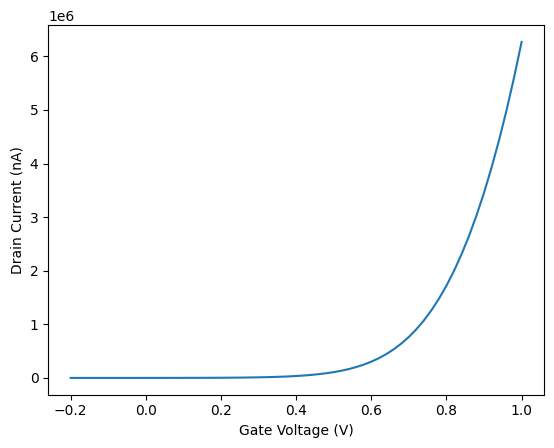

In [3]:
# graph a single cycle
cycle = 0
trial = 1
concentration = 100.0
experiment = "20230525_Hapt_2kPeg_H4"

indices = get_available_indices(egfet)
print(indices)
# get the data
cycle_data = egfet.loc[(experiment, concentration, trial, cycle)]
fig = plt.Figure()
plt.plot(cycle_data["Gate Voltage (V)"], cycle_data["Drain Current (nA)"])
plt.xlabel("Gate Voltage (V)")
plt.ylabel("Drain Current (nA)")
plt.show()

In [4]:
class VthExtractor:
    def __init__(self, k, vds:float, vth_dev:float, ref_elect:float):

        self.vds = vds
        self.kn = k
        self.vth_dev = vth_dev
        self.ref_elect = ref_elect
        
    def __call__(self, vref:np.ndarray, ids:np.ndarray):
        vth  = vref - 1/self.vds * ( ids/self.kn + 0.5*self.vds**2) - self.vth_dev - self.ref_elect
        return vth

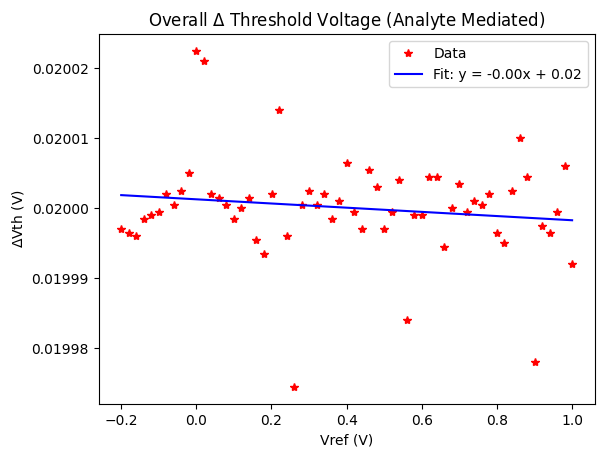

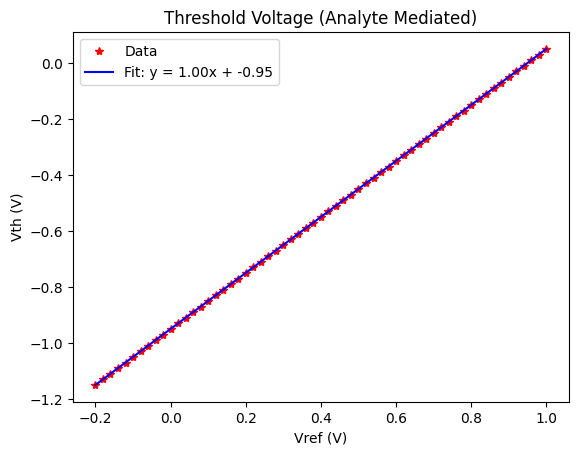

dVth_bar = 0.020000105595807234
dVth_std = 7.249362845776829e-06


In [5]:
# Constants
kn = 225 * 1000 # S (from the datasheet)
vds = 0.5 # V
vref = cycle_data["Gate Voltage (V)"].values
ids = cycle_data["Drain Current (nA)"].values * 1e-9 # convert to A

vth = VthExtractor(kn, vds, 0.5, 0.199)(vref, ids)
dvth = np.gradient(vth)
fig = plt.Figure()
plt.plot(vref, dvth, 'r*')
A = np.vstack([vref, np.ones(len(vref))]).T
res = np.linalg.lstsq(A, dvth, rcond=None)
m,c = res[0]
residuals = res[1]
rsq = 1 - residuals / (len(dvth) * np.var(dvth))
plt.plot(vref, m*vref + c, 'b-')
plt.title("Overall $\Delta$ Threshold Voltage (Analyte Mediated)")
plt.xlabel("Vref (V)")
plt.ylabel("$\Delta$Vth (V)")
plt.legend(["Data", f"Fit: y = {m:.2f}x + {c:.2f}"])
plt.show()
fig = plt.Figure()
plt.plot(vref, vth, 'r*')
A = np.vstack([vref, np.ones(len(vref))]).T
res = np.linalg.lstsq(A, vth, rcond=None)
m,c = res[0]
residuals = res[1]
rsq = 1 - residuals / (len(vth) * np.var(vth))
plt.plot(vref, m*vref + c, 'b-')
plt.title("Threshold Voltage (Analyte Mediated)")
plt.legend(["Data", f"Fit: y = {m:.2f}x + {c:.2f}"])
plt.xlabel("Vref (V)")
plt.ylabel("Vth (V)")
plt.show()
print(f"dVth_bar = {np.mean(dvth)}")
print(f"dVth_std = {np.std(dvth)}")

(array([ 2.,  1.,  0.,  2., 13., 30.,  9.,  1.,  1.,  2.]),
 array([0.0199745, 0.0199793, 0.0199841, 0.0199889, 0.0199937, 0.0199985,
        0.0200033, 0.0200081, 0.0200129, 0.0200177, 0.0200225]),
 <BarContainer object of 10 artists>)

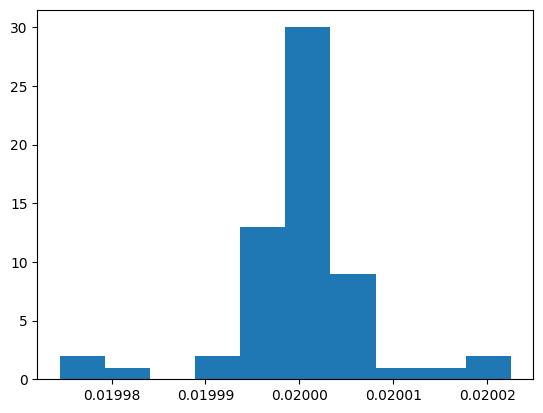

In [6]:
# Histogram of the delta threshold voltage
fig = plt.Figure()
plt.hist(dvth, bins=10)

(16833, 5)


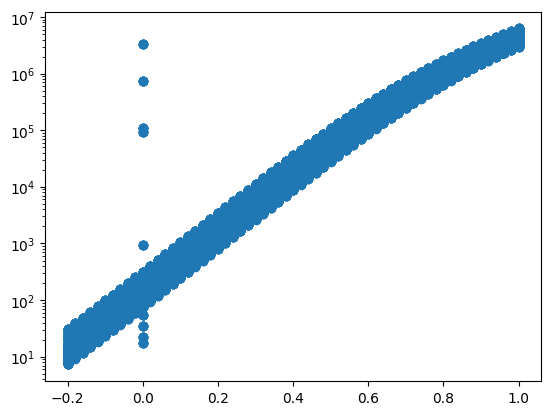

                           level_0  Drain Voltage (V)  Drain Current (nA)  \
Concentration Cycle index                                                   
100.00        0     0            0           0.500004             31.1377   
                    1            1           0.499992             39.1753   
                    2            2           0.499989             49.3052   
                    3            3           0.499986             62.1135   
                    4            4           0.499983             78.3178   
...                            ...                ...                 ...   
0.01          37    2196     16828           0.499986             57.6176   
                    2197     16829           0.499982             72.8137   
                    2198     16830           0.499978             92.0954   
                    2199     16831           0.500000            116.5610   
                    2200     16832           0.499999            147.6140   

In [7]:
# at a provided oncentrations
concentration = slice(None)
cycle = slice(None)
trial = 1

data = egfet.loc[(experiment, concentration, trial, cycle)]
print(data.shape)
vref = data["Gate Voltage (V)"].values
ids = data["Drain Current (nA)"].values # convert to A
plt.scatter(vref, ids)
plt.yscale("log")
plt.show()
print(data)

In [8]:
ids = data["Drain Current (nA)"].values 

ids_max = 1e6
ids_min = 2e6
ids_step = (ids_max - ids_min)/5

ids_thresholds = np.arange(ids_min, ids_max, ids_step)
print(ids_thresholds)

[2000000. 1800000. 1600000. 1400000. 1200000.]


In [9]:
def get_vrefs_at_thresh(egfet, experiment, conc, trial, cycle, ids_thresh):
    try:
        temp = egfet.loc[(experiment, conc, trial, cycle)]
    except KeyError:
        return None, None, None
    if len(temp) == 0:
        return None, None, None
    try:
        potential_idxs = np.abs(temp.values - ids_thresh) < 1e4
    except:
        return None, None, None
    if potential_idxs.sum() == 0:
        return None, None, None
    # get vrefs for each concentration
    vrefs_at_thresh = temp.iloc[potential_idxs]["Gate Voltage (V)"].values
    return vrefs_at_thresh, ids_thresh, conc

In [10]:
# get all concentrations
from collections import defaultdict
import concurrent.futures
from functools import partial
from tqdm.notebook import tqdm 
from concurrent.futures import ThreadPoolExecutor as pool
import concurrent
concentrations = data.index.get_level_values(0).unique()
# get trials
trials = data.index.get_level_values(1).unique()
# get cycles
cycles = data.index.get_level_values(2).unique()
total_points = len(concentrations) * len(trials) * len(cycles) * len(ids_thresholds)
ids_thresh_lines = defaultdict(partial(defaultdict, list))
futures = []
pbar = tqdm(total=total_points, desc="Curves Evaluated")
for trial in trials:
    for cycle in cycles:
        for conc in concentrations:
            for ids_thresh in ids_thresholds:
                res = get_vrefs_at_thresh(egfet, experiment, conc, trial, cycle, ids_thresh)
                vrefs, ids_t, conc = res
                pbar.update(1)
                if vrefs is None:
                    continue
                ids_thresh_lines[ids_t][conc].extend(vrefs)
                # future = executor.submit(get_vrefs_at_thresh, egfet, experiment, conc, trial, cycle, ids_thresh)
                # futures.append(future)
                # completed, remaining = concurrent.futures.wait(futures, timeout=0)
                # for future in completed:
                #     vrefs, ids_thresh, conc = future.result()
                #     pbar.update(1)
                #     if vrefs is None:
                #         continue
                #     ids_thresh_lines[ids_thresh][conc].extend(vrefs)
                # futures = list(remaining)
                # if len(futures) > 500:
                #     for future in concurrent.futures.as_completed(futures):
                #         vrefs, ids_thresh, conc = future.result()
                #         pbar.update(1)
                #         if vrefs is None:
                #             continue
                #         ids_thresh_lines[ids_thresh][conc].extend(vrefs)
                #     futures = []
    

ImportError: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html

In [ ]:
ids_thresh_lines.keys()

dict_keys([2000000.0])

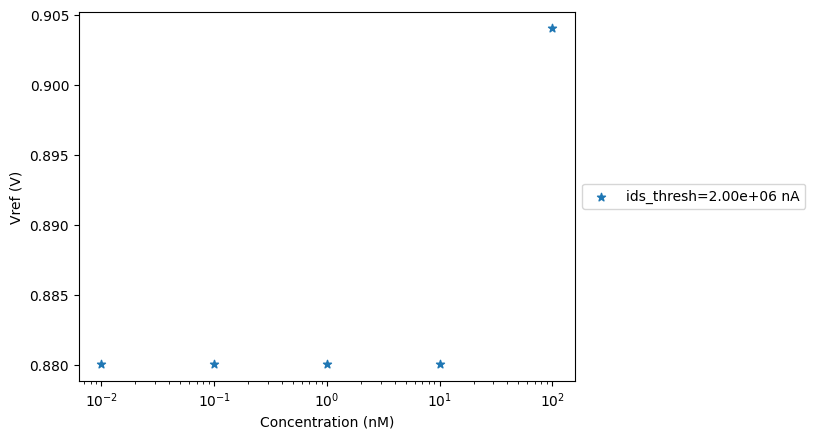

In [ ]:
# plot the lines for each concentration by mean 
fig = plt.Figure()

for ids_thresh, concs in ids_thresh_lines.items():

    concs, threshes = zip(*concs.items())
    threshed = [np.mean(thresh) for thresh in threshes]
    thresherr = [np.std(thresh) for thresh in threshes]
    plt.scatter(concs, threshed, label=f"ids_thresh={ids_thresh:.2e} nA", marker='*')
    
    #plt.errorbar(concs, threshed, yerr=thresherr, fmt="|")
plt.xlabel("Concentration (nM)")
plt.ylabel("Vref (V)")
plt.xscale("log")
# put legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

Text(0, 0.5, 'Frequency')

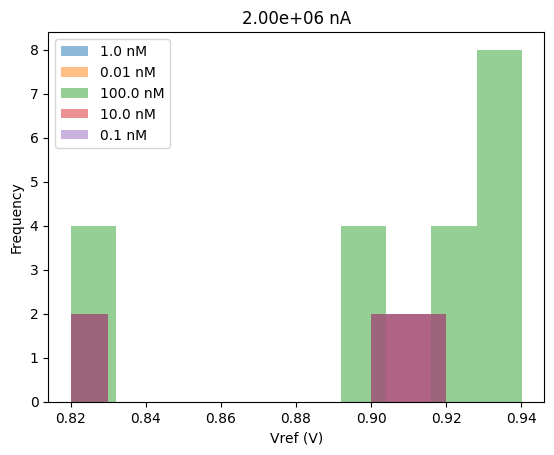

In [ ]:
key = 2e6
plt.figure()
for conc, vrefs in ids_thresh_lines[key].items():
    plt.hist(vrefs, label=f"{conc} nM", alpha=0.5)
plt.legend()
plt.title(f"{key:0.2e} nA")
plt.xlabel("Vref (V)")
plt.ylabel("Frequency")

What would be the explanation for the low variance in threshold voltage at ids_ref for different concentrations?

Notes:

For each analyte type, the $v_{th}^*$ distribution mean changes, explaining how the different analytes were easily separable with simple models. However, the concentration has a far less pronounced effect on $v_{th}^*$. This may also explain why regression is difficult to do as well given the overlaps in distributions for each concentration. Maybe it would be sufficient to do classification for concentration since we effectively have a categorical distribution of concentration inputs. This would be a good test for separability.


Maybe the surface is saturating?


In terms of EGFET, the variables to optimize over would be mean gap between H4 and controls and the variance of the H4 threshold voltage distribution.